In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings

#stats
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
# import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [2]:
st_words = stopwords.words('english')

In [3]:
hate_speech = pd.read_csv('../resource/train/hate_speech_kaggle_train.txt',sep='\t', names=['ID','label','text'])

In [4]:
offensive_speech = pd.read_csv('../resource/train/offensive_train.txt',sep='\t', names=['ID','label','text'])

In [5]:
harrassment_speech = pd.read_csv('../resource/train/onlineHarassmentDataset.txt', sep='\t', names=['ID','label','text'])

In [6]:
toxic_speech = pd.read_csv('../resource/train/kaggle_toxic_train.csv')
toxic = toxic_speech.loc[(toxic_speech['toxic']==1) | (toxic_speech['severe_toxic']==1) | (toxic_speech['obscene']==1) | (toxic_speech['threat']==1) | (toxic_speech['insult']==1)| (toxic_speech['identity_hate']==1),['id','comment_text']]
normal = toxic_speech.loc[(toxic_speech['toxic']==0) & (toxic_speech['severe_toxic']==0) & (toxic_speech['obscene']==0) & (toxic_speech['threat']==0) & (toxic_speech['insult']==0) & (toxic_speech['identity_hate']==0),['id','comment_text']]

toxic['label'] = 1
normal['label'] = 0

toxic_speech = pd.concat([toxic,  normal])

In [7]:
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")

In [8]:
datasets = {}

datasets['hate_speech'] = hate_speech
datasets['offensive data']= offensive_speech
datasets['harassment data']= harrassment_speech
datasets['toxic_speech']=toxic_speech

datasets['total'] = pd.concat(datasets.values())

for k,v in datasets.items():
    print(k, len(v))

hate_speech 9507
offensive data 117106
harassment data 20348
toxic_speech 159571
total 306532


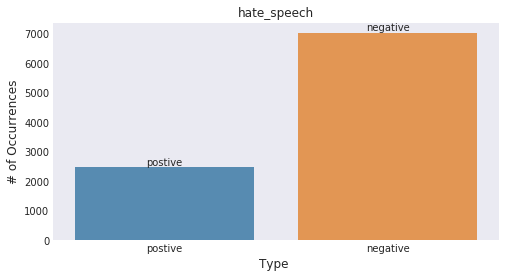

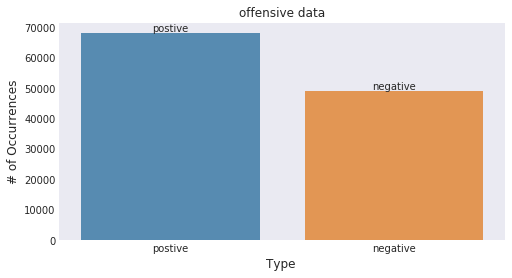

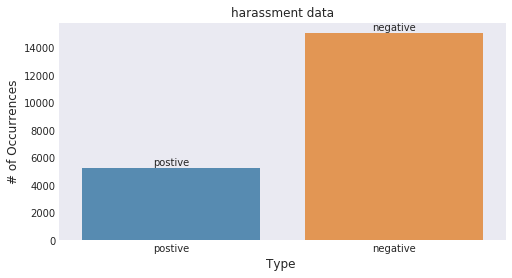

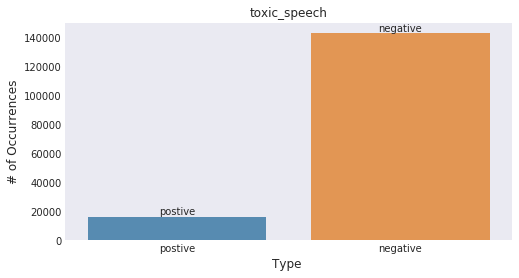

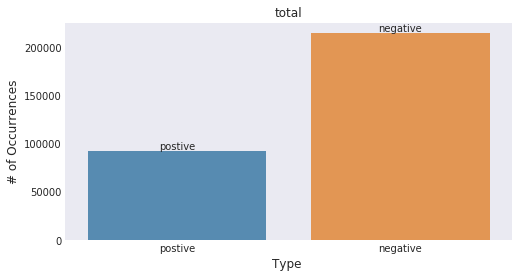

In [9]:
for k,v in datasets.items():
    x=[v['label'].sum(),len(v)-v['label'].sum()]
    
    #plot
    plt.figure(figsize=(8,4))
    ax= sns.barplot(['postive','negative'], x, alpha=0.8)
    plt.title(k)
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('Type ', fontsize=12)
    #adding the text labels
    rects = ax.patches
    labels = ['postive','negative']
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [11]:
for k,v in datasets.items():
    print(k)
    
        
    
    text=' '.join(v['text'])
    wc= WordCloud(background_color="black",max_words=2000,stopwords=st_words)
    wc.generate(text)
    plt.figure(figsize=(20,10))
    plt.axis("off")
    plt.title("Words frequented in " + k, fontsize=20)
    plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-14f55ae6ce4b>, line 3)

["Now my daughter's hitting puberty, I'm not so much losing my little girl as gaining an erection .",
 'I was feeling horny, so I rang the wife . " Tell me what you\'re wearing, " I said . " It\'s just a little robe, " she replied in a husky voice . " Nice . You gonna play with yourself for me, babe? " " No . " " Oh go on, " I begged, " I\'m horny . " " And I\'m on a Cancer ward, Dave ! "',
 'My mate said to me, " What\'s the first thing you\'d do if you won the lottery? " I said, " I\'d buy the house next door to my boss . " He said, " Really? I thought you couldn\'t stand the cunt . " I said, " I can\'t . I\'d let a load of Paki\'s live there rent free . "',
 'I went to a prostitute last night I said, " How much, love? " She said, " £40 . " " Oh no, " I replied, " I\'ve only got £37 . 50 . " She said, " It\'s £40 or nothing . " " That\'s awfully kind of you, " I smiled, " I\'ll give you nothing . "',
 "I don't know why people keep saying rape isn't funny . After I was done with the l